NOTE: If you want to examine a 5MHz signal, you need to sample at at least 10MHz (Nyquist and Shannon theorems).

### PCO default params (w/o MM manipulation)
{'serial': 61006126, 'type': 'pco.edge 4.2 CL', 'sub type': 0, 'interface type': 'Camera Link ME4', 'min exposure time': 0.0001, 'max exposure time': 10.0, 'min exposure step': 1e-05, 'min delay time': 0.0, 'max delay time': 1.0, 'min delay step': 1e-05, 'max 
width': 2060, 'max height': 2048, 'min width': 40, 'min height': 16, 'roi steps': (20, 1), 'bit resolution': 16, 'roi is vert symmetric': True, 'roi is horz symmetric': False, 'has timestamp': True, 'has ascii-only timestamp': False, 'has acquire': True, 'has 
extern acquire': True, 'has metadata': False, 'has ram': False, 'pixelrates': [95333333, 272250000], 'binning horz vec': [1, 2, 4]

{'frame time ns': 28442854, 'frame time s': 0, 'exposure time ns': 9999441, 'exposure time s': 0, 'trigger system delay ns': 4294967295, 'trigger system jitter ns': 4294967295, 'trigger delay ns': 0, 'trigger delay s': 0}

NOTE: delay and jitter times are the MAX values. Real values have to be experimentally measured (picoscope)

For the full frame 2048 x 2060

* Frame time - exposure (default) = approx 18 ms
* Calculated full frame readout = approx 15 ms
* Measured jitter and sys delay = approx 3 ms

* Frame time = exposure + readout + jitter + delay
* These parameters change if the lightsheet mode is used, in which case the line time is what determines exposure

### Input and effective exposure time - parallel camera trigger with ctr1

Loop is consistent with total number of frames requested by MM and completes the acquisition in 2D imaging.

Exp = 20 ms, 0 extra wait time, 200 time points (2D). Measurement of sys delay and jitter

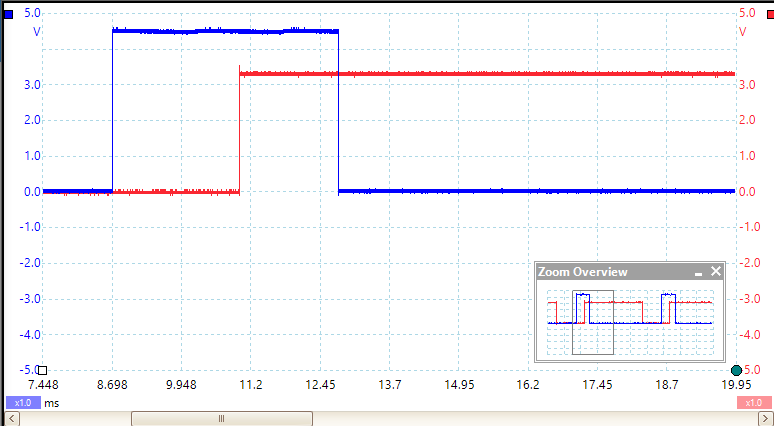

Exp = 10 ms, 100 timepoints (2D). Observe that the *real* exposure is less than the input.

Effective exp = Input ("camera") exposure - sys delay - jitter

Then, the frame time becomes:

**Frame time = input ("camera") exposure + full frame readout (w/ pixel read size)**

(This explains why the manual describes frame time as: time to complete image exposure and readout. Except that exposure *includes* the system delay)

* Minimal effective exp = approx 7 ms

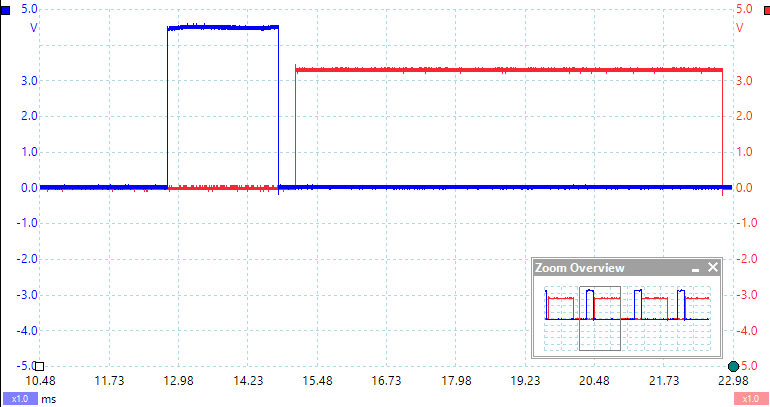

Correcting for effective exposure. 2D imaging: uses counter pulse train with total samples = total time points

* setting exposure time < readout give highest trigger frequency at 1/readout
* clearly the exposure out status don't seem as close as possible to one another - this is because this is only the exp of the first row

**Image below is max frame rate at 5 ms (camera) exposure time for the full frame**

PROBLEM: camera does not respond for exposure times under 3 ms (lowest is supposed to be 0.1 ms)

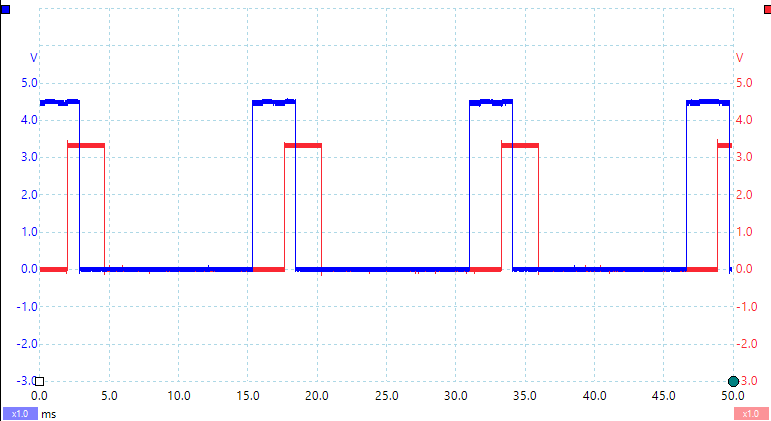

* Not setting the lower bound causes erratic behavior as seen below (exp = 10 ms, trigger freq broken on purpose)

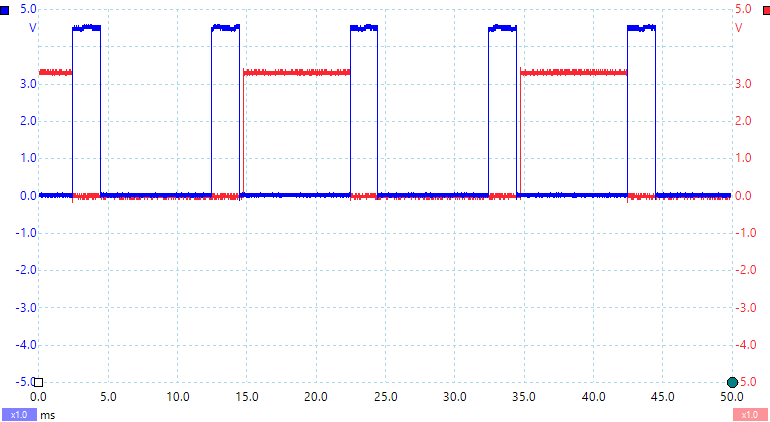

Image below is at exp (camera) = 25 ms. The max frame rate is almost truly 1/ exp(cam), as it is 1/exp+line_time. Not adding the line time causes erratic  behavior. Observe how the interval between cam exp status (red) is minimal and equal to system delays (plus any user defined, if any)
* to get this type of close exposures at the lowest exp times, we would have to image only partial ROI so that the readout time decreases

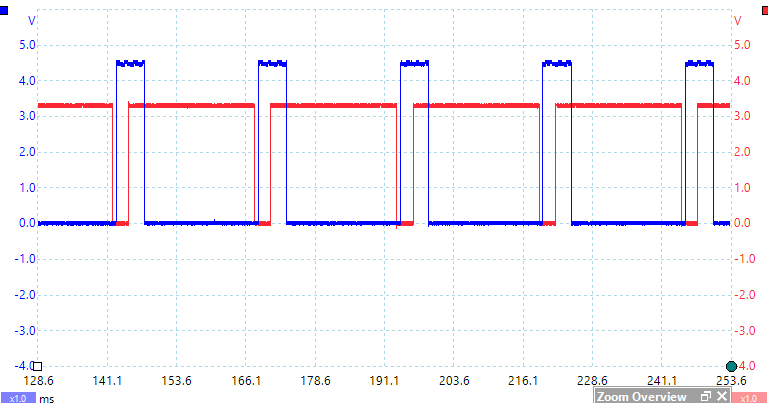

TODO: 3D imaging: uses counter pulse train with total samples = total slices per stack. Introduced delay between stacks with time.sleep (can be zero)

Errors in previous imaging was probably due to a cumulative offset of the camera triggers or running out of buffers (this would still be a problem in this case, as we cannot handle the memory allocation)

NOTE: the system delay seems to be very high

### Sampling for each cam exposure using ctr0

First configuration: Using the rising edge of any of the cam's exp out leads to a (small) final overhang. Here cam exp = 25 ms, no delay. sampling rate = samples / exposure period. Red: camera exp out, blue: ctr0 output

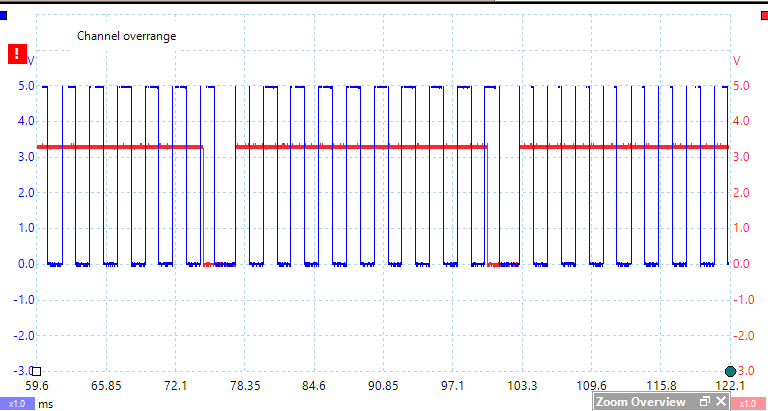

Second configuration: using the rising edge of the trigger at ctr1 (connecting output through hardware). can't see the ctr1 trigger, but will see that blue (ctr0 output) now start before the cam exposure

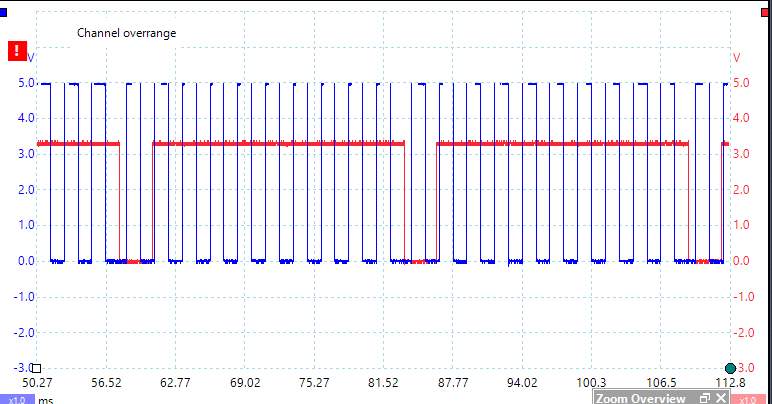

This might actually be a problem: meet the following (depends on Kevin's answer)

* between exposures of the same stack (and inclusing the last time to read last rolling frame), the light has to be ON
* light can only turn off between different stacks
* if doing 2d, light can still turn off between stacks (but now one stack = one time point)

RESULT: sync is fine 

Preliminary aotf waveform driving (does not have to be AO in the end, will likely need an analog multiplier)

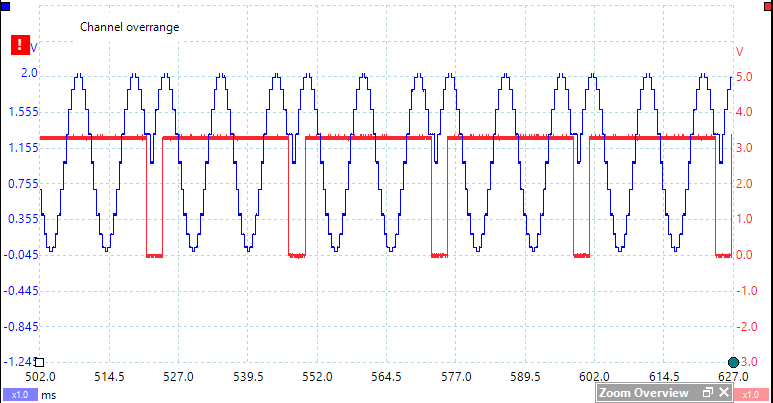